In [143]:
from pygments.lexer import include
from sqlalchemy import column
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
df = chronic_kidney_disease.data.original

# metadata
df.head(20)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [144]:
(df.rename
 (columns={
    'bp':'blood pressure',
    'sg':'specific gravity',
    'al':'albumin',
    'su':'sugar',
    'bgr':'blood glucose random',
    'bu':'blood urea',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed cell volume',
    'wbcc': 'white blood cell count',
    'rbcc':'red blood cell count',
}
, inplace=True))

df

,age,blood pressure,specific gravity,albumin,sugar,rbc,pc,pcc,ba,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [145]:
df.drop(columns=['rbc','htn','dm','cad','appet','pe','ane','sc', 'ba', 'pc','pcc'], inplace=True)
df

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


In [146]:
df['hemoglobin']  = df['hemoglobin'] * 10
print(df.hemoglobin)

0      154.0
1      113.0
2       96.0
3      112.0
4      116.0
       ...  
395    157.0
396    165.0
397    158.0
398    142.0
399    158.0
Name: hemoglobin, Length: 400, dtype: float64


In [147]:
df['class'] = df['class'].replace({
   'ckd': 'a',
   'notckd' : 'c'
})
df

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,113.0,38.0,6000.0,NaN,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,96.0,31.0,7500.0,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


In [148]:
df = df[(df.isna().sum(axis=1)< 3)]
df.info()

<class 'pandas.DataFrame'>
Index: 265 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     262 non-null    float64
 1   blood pressure          262 non-null    float64
 2   specific gravity        264 non-null    float64
 3   albumin                 265 non-null    float64
 4   sugar                   265 non-null    float64
 5   blood glucose random    255 non-null    float64
 6   blood urea              260 non-null    float64
 7   sodium                  244 non-null    float64
 8   potassium               244 non-null    float64
 9   hemoglobin              262 non-null    float64
 10  packed cell volume      263 non-null    float64
 11  white blood cell count  249 non-null    float64
 12  red blood cell count    244 non-null    float64
 13  class                   265 non-null    str    
dtypes: float64(13), str(1)
memory usage: 31.1 KB


In [149]:
df_a = df[(df['class'] == 'a')]
df_a

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,62.0,90.0,1.020,2.0,1.0,169.0,48.0,138.0,2.9,134.0,47.0,11000.0,6.1,a
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,122.0,40.0,9800.0,4.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,86.0,26.0,5000.0,2.5,a
248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,138.0,4.5,126.0,37.0,10200.0,4.1,a


In [150]:
df_c = df[(df['class'] == 'c')]
df_c

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,150.0,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,170.0,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,159.0,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,154.0,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,130.0,49.0,8300.0,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


In [151]:
df_a.info()

<class 'pandas.DataFrame'>
Index: 126 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     123 non-null    float64
 1   blood pressure          125 non-null    float64
 2   specific gravity        125 non-null    float64
 3   albumin                 126 non-null    float64
 4   sugar                   126 non-null    float64
 5   blood glucose random    120 non-null    float64
 6   blood urea              125 non-null    float64
 7   sodium                  108 non-null    float64
 8   potassium               108 non-null    float64
 9   hemoglobin              125 non-null    float64
 10  packed cell volume      125 non-null    float64
 11  white blood cell count  113 non-null    float64
 12  red blood cell count    108 non-null    float64
 13  class                   126 non-null    str    
dtypes: float64(13), str(1)
memory usage: 14.8 KB


In [152]:
df_c.info()

<class 'pandas.DataFrame'>
Index: 139 entries, 250 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     139 non-null    float64
 1   blood pressure          137 non-null    float64
 2   specific gravity        139 non-null    float64
 3   albumin                 139 non-null    float64
 4   sugar                   139 non-null    float64
 5   blood glucose random    135 non-null    float64
 6   blood urea              135 non-null    float64
 7   sodium                  136 non-null    float64
 8   potassium               136 non-null    float64
 9   hemoglobin              137 non-null    float64
 10  packed cell volume      138 non-null    float64
 11  white blood cell count  136 non-null    float64
 12  red blood cell count    136 non-null    float64
 13  class                   139 non-null    str    
dtypes: float64(13), str(1)
memory usage: 16.3 KB


In [153]:
df_a.describe(include='all')

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
count,123.000000,125.000000,125.000000,126.000000,126.000000,120.000000,125.000000,108.000000,108.000000,125.000000,125.000000,113.000000,108.000000,126
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
mean,57.081301,80.720000,1.013560,1.849206,0.809524,181.200000,80.420000,133.731481,4.751852,106.432000,32.440000,9450.442478,3.976852,NaN
std,14.465104,15.769305,0.004527,1.437038,1.366539,93.549394,60.501346,7.666661,4.203592,21.896507,7.150908,3720.458015,0.844510,NaN
min,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,31.000000,9.000000,2600.000000,2.100000,NaN
25%,49.500000,70.000000,1.010000,0.250000,0.000000,107.000000,37.000000,131.750000,3.800000,95.000000,29.000000,7100.000000,3.400000,NaN
50%,60.000000,80.000000,1.015000,2.000000,0.000000,158.000000,60.000000,136.000000,4.200000,108.000000,33.000000,9200.000000,3.900000,NaN
75%,65.000000,90.000000,1.015000,3.000000,1.000000,241.250000,107.000000,139.000000,4.900000,120.000000,37.000000,11000.000000,4.400000,NaN


In [154]:
df_c.describe(include='all')

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
count,139.000000,137.000000,139.000000,139.0,139.0,135.000000,135.000000,136.000000,136.000000,137.000000,138.000000,136.000000,136.000000,139
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139
mean,46.568345,71.313869,1.022482,0.0,0.0,107.385185,32.874074,141.735294,4.335294,151.883212,46.246377,7708.088235,5.380882,NaN
std,15.903719,8.559267,0.002509,0.0,0.0,18.747730,11.482257,4.792332,0.596351,12.845270,4.107695,1815.164727,0.592986,NaN
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,130.000000,40.000000,4300.000000,4.500000,NaN
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,23.500000,138.000000,3.700000,141.000000,43.000000,6300.000000,4.900000,NaN
50%,46.000000,70.000000,1.020000,0.0,0.0,107.000000,33.000000,141.000000,4.500000,150.000000,46.000000,7450.000000,5.300000,NaN
75%,58.000000,80.000000,1.025000,0.0,0.0,123.500000,44.000000,146.000000,4.900000,162.000000,50.000000,9225.000000,5.900000,NaN


In [155]:
def plot_data_to_hist(df):
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(df.select_dtypes(include=['float'])):
        plt.subplot(3, 5,i +1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)

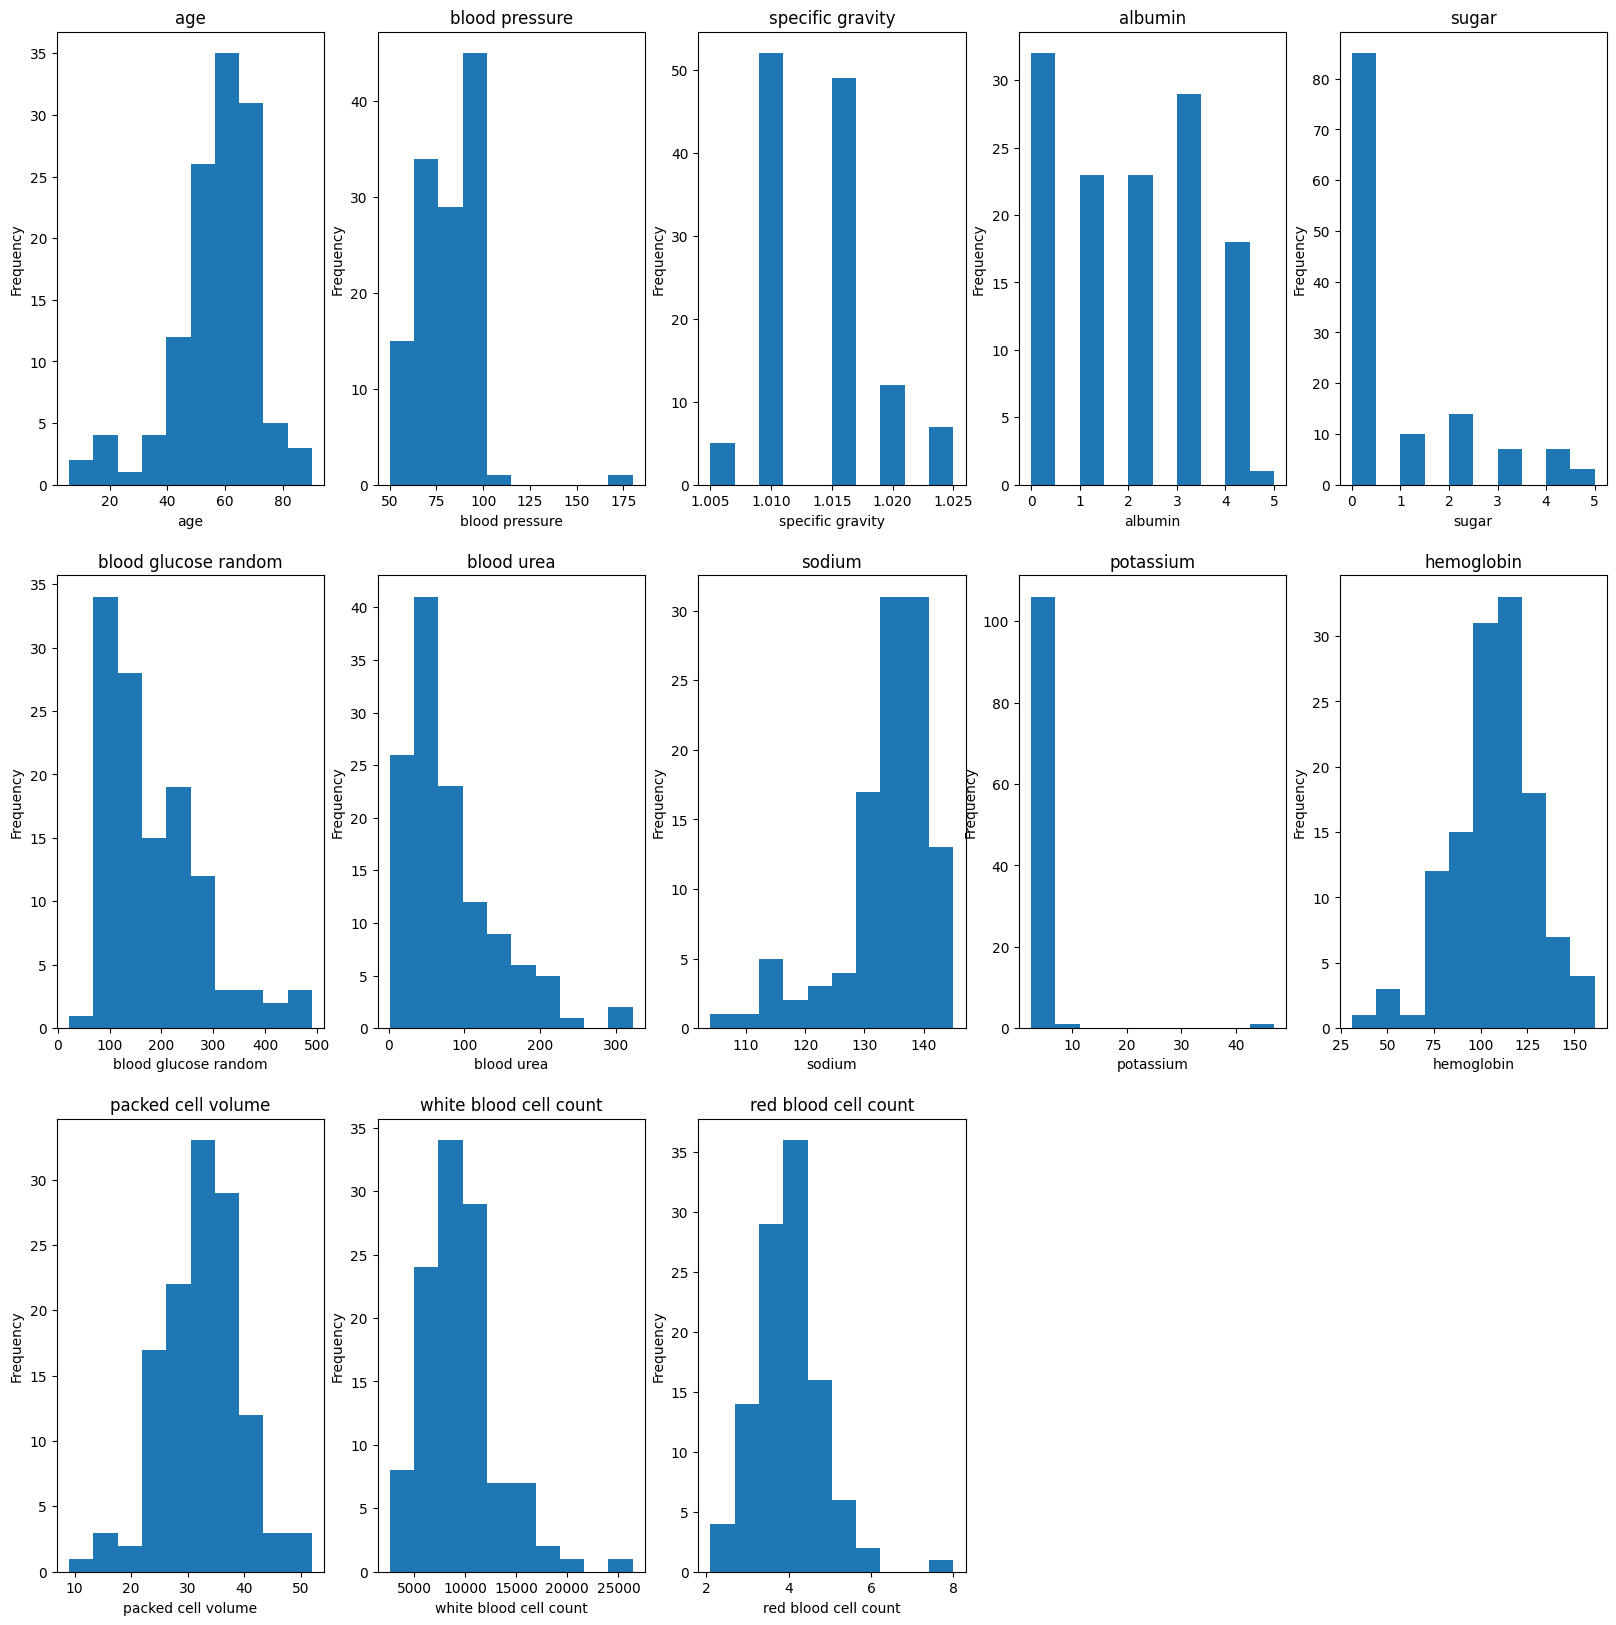

In [156]:
plot_data_to_hist(df_a)

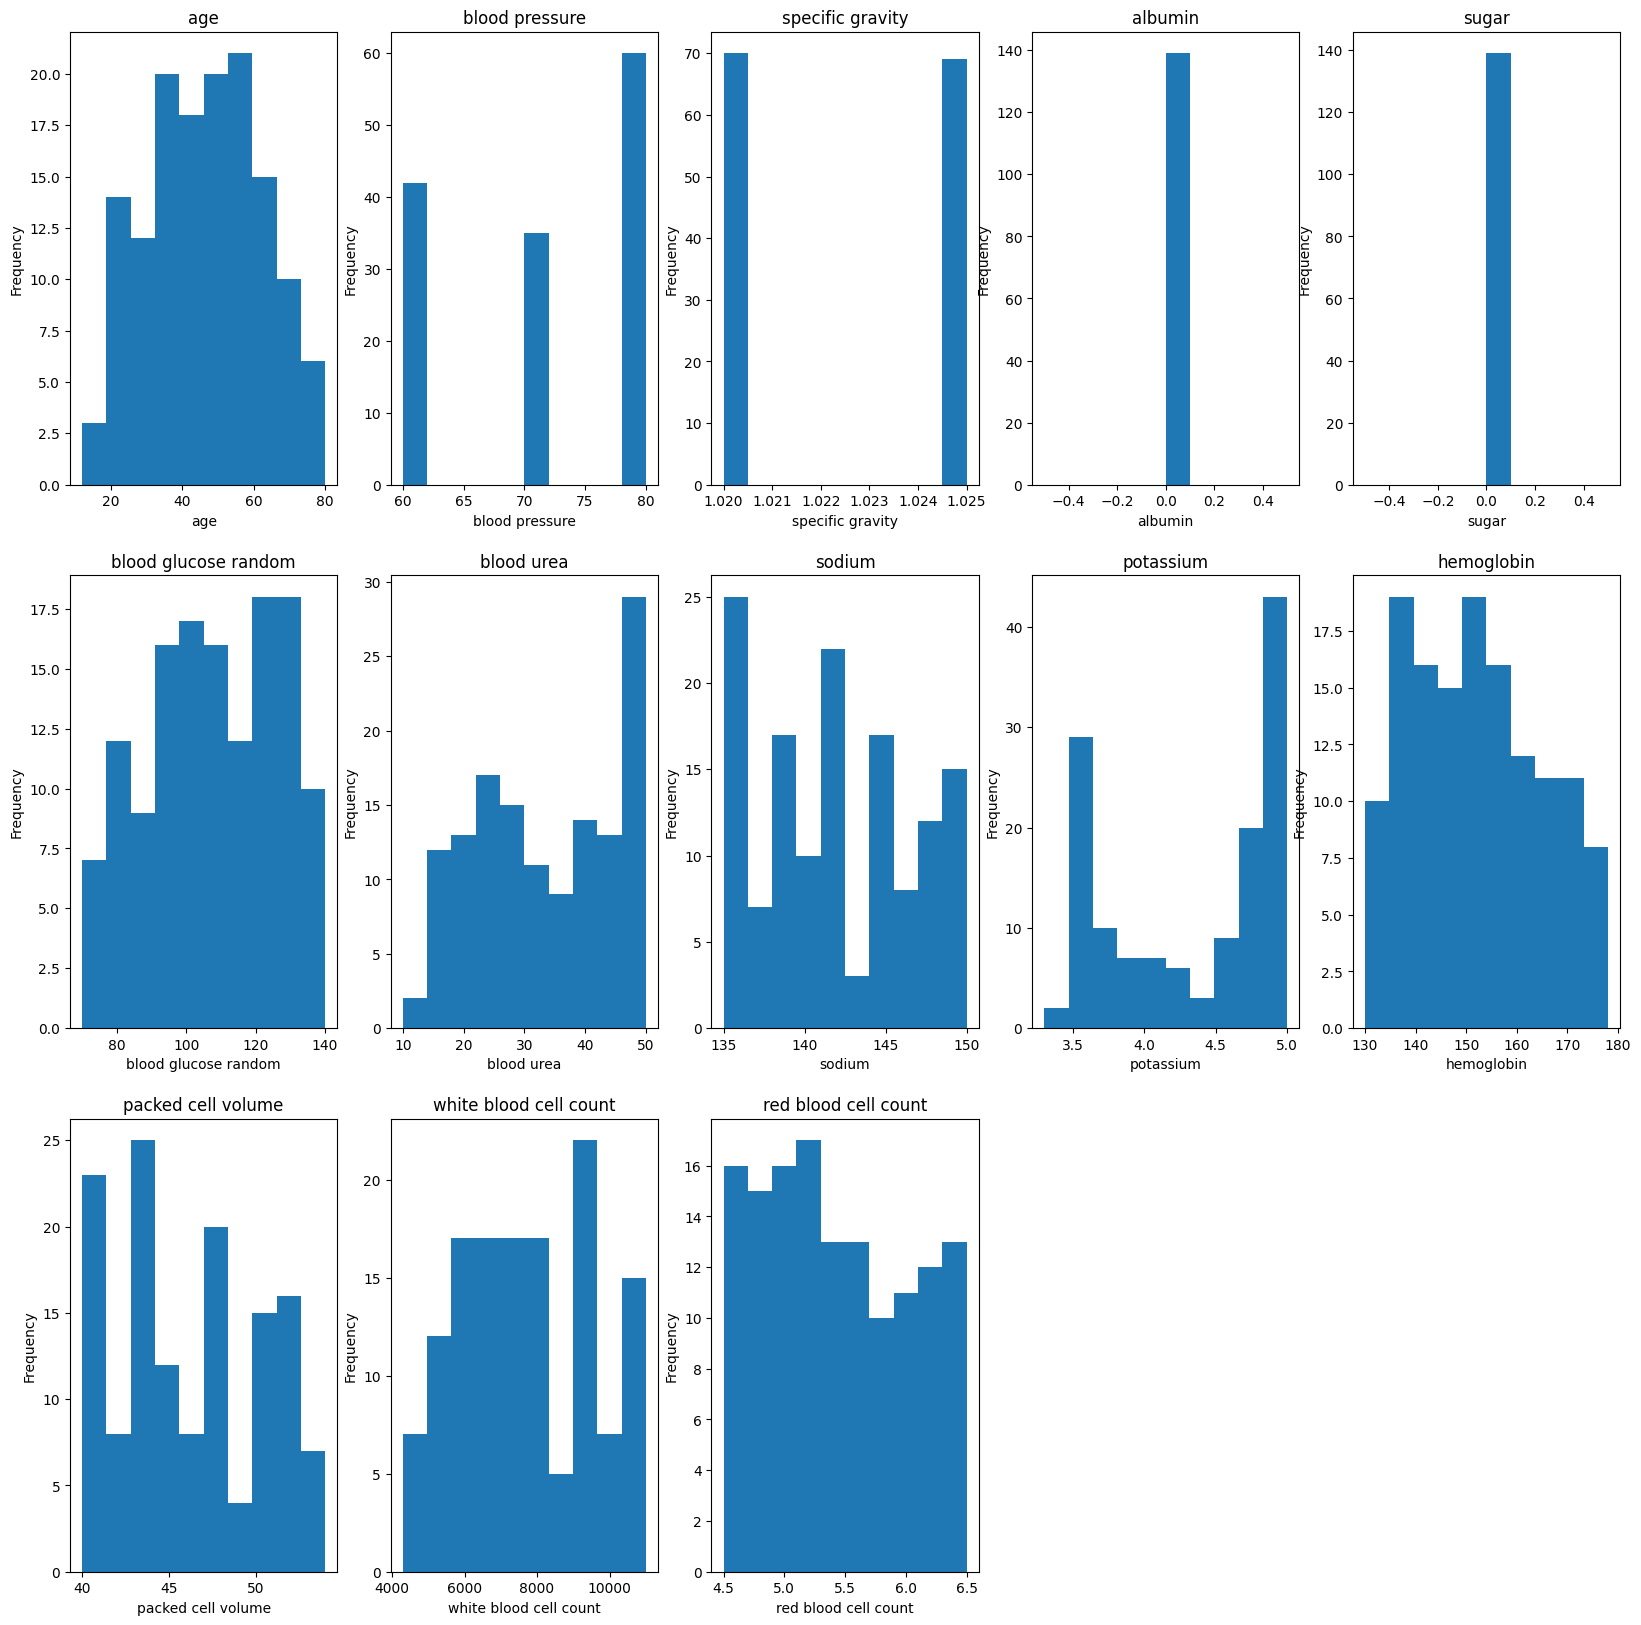

In [157]:
plot_data_to_hist(df_c)

In [158]:
corr_a = df_a.drop(columns=['class']).corr()
corr_a

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,0.061731,-0.004869,-0.016726,0.138945,0.205133,0.022593,-0.033951,-0.007490,-0.006174,-0.044467,0.015848,-0.016616
blood pressure,0.061731,1.000000,0.066651,0.022210,0.181615,0.041162,0.064547,0.148208,0.068721,-0.097107,-0.104029,-0.040061,0.095163
specific gravity,-0.004869,0.066651,1.000000,-0.061509,-0.044993,-0.083967,-0.037977,0.143235,0.046375,0.114042,0.106808,-0.026688,0.120779
albumin,-0.016726,0.022210,-0.061509,1.000000,0.115618,0.099096,0.426974,-0.179331,0.176842,-0.371257,-0.329337,0.067898,-0.231920
sugar,0.138945,0.181615,-0.044993,0.115618,1.000000,0.692159,-0.053597,0.052022,0.152143,0.184927,0.120275,0.103631,0.091519
blood glucose random,0.205133,0.041162,-0.083967,0.099096,0.692159,1.000000,-0.029130,-0.053968,0.019949,0.144666,0.097501,0.049505,0.140348
blood urea,0.022593,0.064547,-0.037977,0.426974,-0.053597,-0.029130,1.000000,-0.320019,0.197928,-0.608652,-0.568745,-0.135999,-0.487755
sodium,-0.033951,0.148208,0.143235,-0.179331,0.052022,-0.053968,-0.320019,1.000000,0.002814,0.295139,0.317933,0.019716,0.266934
potassium,-0.007490,0.068721,0.046375,0.176842,0.152143,0.019949,0.197928,0.002814,1.000000,-0.181083,-0.198267,-0.169084,-0.185432
hemoglobin,-0.006174,-0.097107,0.114042,-0.371257,0.184927,0.144666,-0.608652,0.295139,-0.181083,1.000000,0.951500,0.071613,0.779202


In [164]:
corr_c = df_c.drop(columns=['class', 'sugar','albumin']).corr()
corr_c

,age,blood pressure,specific gravity,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,-0.071093,-0.092814,0.101408,0.078620,0.110581,-0.094361,0.056334,-0.009969,0.128762,-0.045118
blood pressure,-0.071093,1.000000,0.084470,0.004094,-0.084057,-0.107489,-0.064606,0.157748,-0.007854,-0.098981,-0.030603
specific gravity,-0.092814,0.084470,1.000000,-0.038416,-0.050116,-0.033880,0.074253,0.026303,-0.007082,-0.028054,0.067207
blood glucose random,0.101408,0.004094,-0.038416,1.000000,-0.067850,-0.007900,0.146784,-0.147729,-0.257604,-0.069143,-0.196675
blood urea,0.078620,-0.084057,-0.050116,-0.067850,1.000000,0.005475,0.047313,0.085647,0.116931,0.041256,-0.010890
sodium,0.110581,-0.107489,-0.033880,-0.007900,0.005475,1.000000,0.065758,-0.011060,-0.001524,0.338373,-0.092615
potassium,-0.094361,-0.064606,0.074253,0.146784,0.047313,0.065758,1.000000,0.099223,-0.168690,0.041307,-0.052842
hemoglobin,0.056334,0.157748,0.026303,-0.147729,0.085647,-0.011060,0.099223,1.000000,0.057235,-0.191126,0.075912
packed cell volume,-0.009969,-0.007854,-0.007082,-0.257604,0.116931,-0.001524,-0.168690,0.057235,1.000000,-0.085214,0.042696
white blood cell count,0.128762,-0.098981,-0.028054,-0.069143,0.041256,0.338373,0.041307,-0.191126,-0.085214,1.000000,-0.050437


In [160]:
def plot_data_to_heatmap(corr):
    plt.figure(figsize=(10,10))
    plt.imshow(corr, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.columns)
    plt.show()

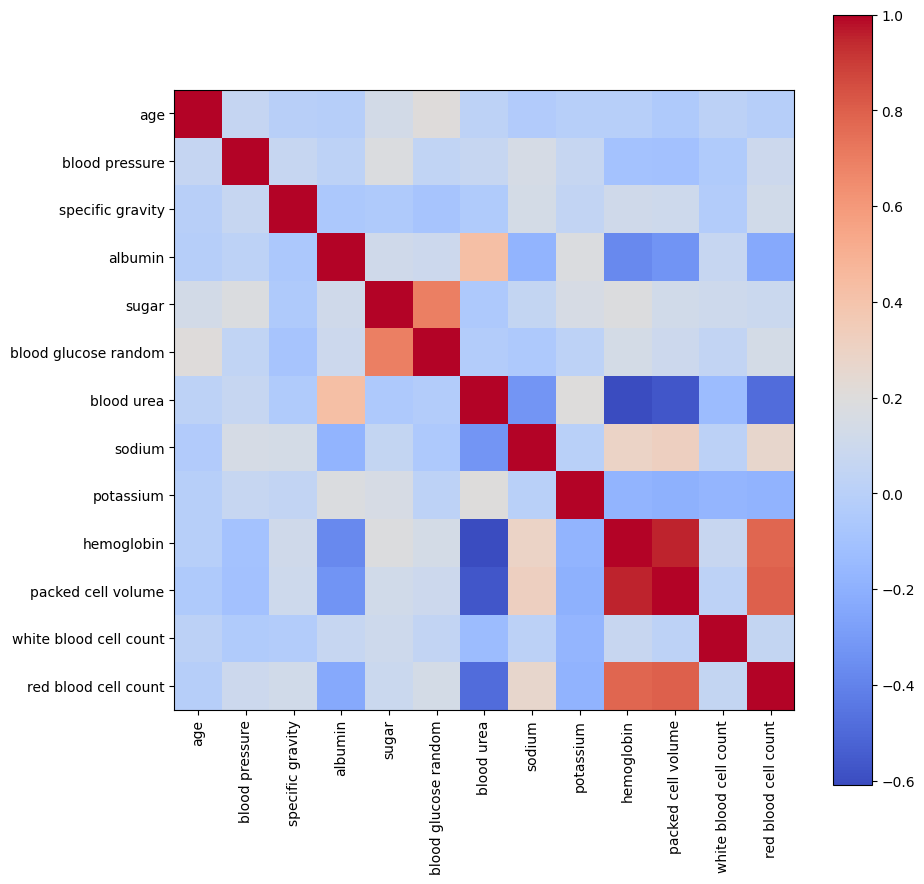

In [161]:
plot_data_to_heatmap(corr_a)

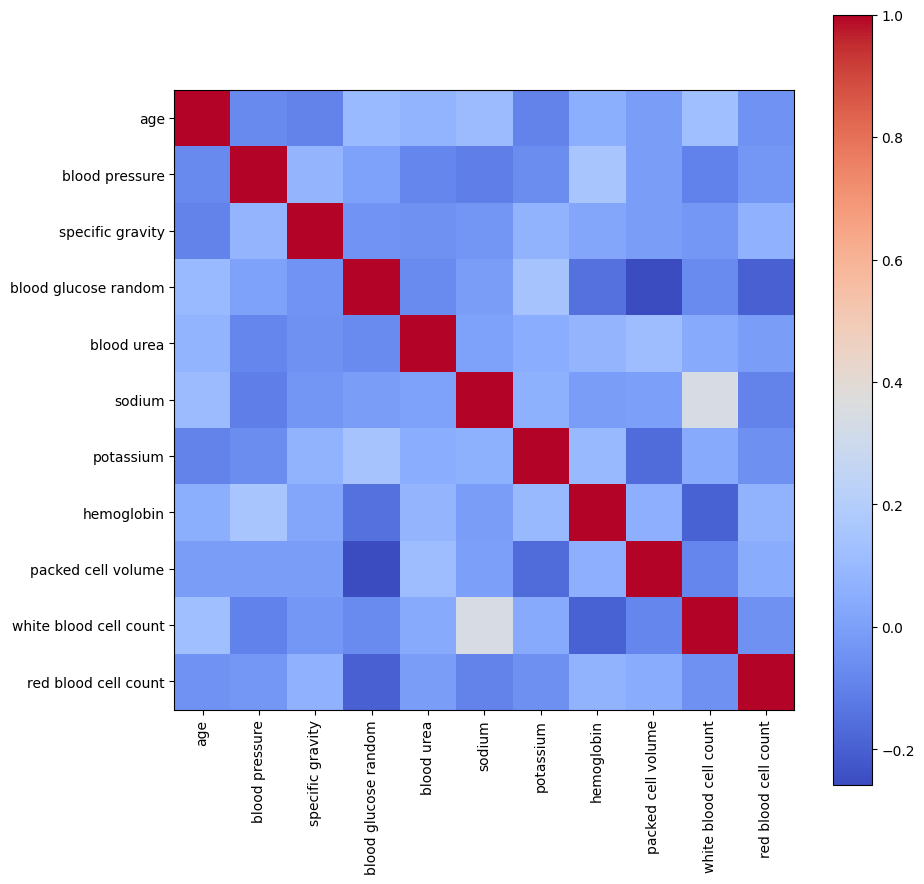

In [165]:
plot_data_to_heatmap(corr_c)